In [18]:
# for Importing the Dataset
import pandas as pd

# for calculating Polarity and Subjectivity
from textblob import TextBlob

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# lets read the dataset
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

# lets check the shape of the dataset
data.shape

(3150, 5)

In [20]:
# lets check the head of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Text Polarity

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [21]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    if isinstance(text, float) and pd.isna(text):
        return 0
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['verified_reviews'].apply(get_polarity)

### Text Subjectivity

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [22]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    if isinstance(text, float) and pd.isna(text):
        return 0
    textblob = TextBlob(str(text))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

C:\Users\Vivobook\AppData\Local\Temp\ipykernel_26896\1496207754.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['polarity'])
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_26896\1496207754.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['subjectivity'])


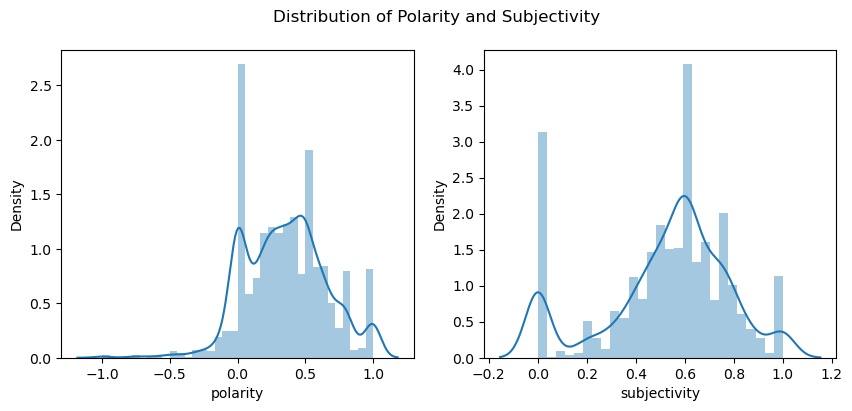

In [23]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

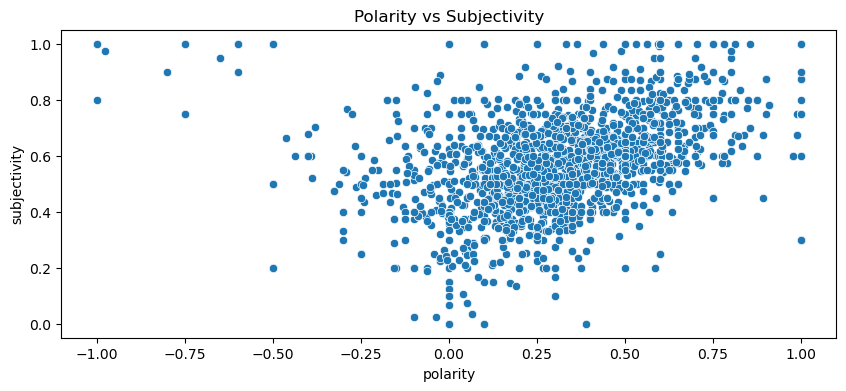

In [25]:
# lets check relation between Polarity and Subjectivity

sns.scatterplot(x='polarity', y='subjectivity', data=data)
plt.title('Polarity vs Subjectivity')
plt.show()